This is the second notebook for this project. in this notebook, the clean data obtain after EDA will be used to structure the data further and prepare it for modelling. This note book seek to answer the following questions;

1. Time it took companies to reach unicorn status.
2. What was the maximum, average and minimum number of years companies took to reach unicorn level per industry.
3. Maximum unicorn company valuation per industry
4. Which unicorn companies have had the biggest return on investments.

To begin, we will import the required libraries and packages for data manipulation and data visualizations. We will be using numpy, pandas, matplotlib and seaborn for analysis in this notebook.

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now that we have imported the required packages, let's load the dataset that will be used. The dataset we will make use of has already been cleaned in the previous notebook.The dataset is store in the /Data/clean data folder in this repository.

In [2]:
# import the clean dataset in /Data/clean data folder named 'unicorns'

unicorns = pd.read_csv('../Data/Clean data/unicorns.csv')

The dataset has been loaded in sucessful, next let's remind ourselve on how the data looks like by previewing the data.

We can achieve this by using the .head() which returns five rows by default. alternatively, we can simply type the name of the dataframe which will display all the rows in a contracted view.

In [52]:
# preview dataset

unicorns.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions),Years_till_unicorn
1068,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,1,5
1069,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,1,2
1070,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,1,3
1071,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,1,16
1072,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners",2020,1,6


From the output cell above, we have a total of 1073 observations and 12 columns in this dataset.

### 1. Time taken by companies to reach unicorn status (valuation at $1B)

The time a company takes to reach unicorn status is the time between when the company was founded and when the company's valuation reached 1 billion dollars.

To calculate this time based on the data we have, we will take the difference between the Year a company become unicorn (date joined) and the year it was founded. 

We have to then assign this difference to another variable (years_till_unicorn). Hence we will have another column added to our dataset.

In [4]:
# substract the year founded from the year joined column in our dataset to know when each company become unicorn
# assign the results to another variable called Year_till_unicorn

unicorns['Years_till_unicorn'] = unicorns['Year Joined'] - unicorns['Year Founded'] 

How many year did the first 5 companies in our dataset become unicorns?



Let us display the the company, industry, year founded, year joined and years_tll_unicorn for the first 5 companies

For this task, we will use the .head() which by dafualt displays the first 5 rows on our dataset.

We do not want to display all the attributes of each company so we will specify the columns to display ie company, industry....

In [53]:
# display the first 5 rows with the columns company, industry, year founded, year joined, and years till unicorn

unicorns[['Company','Industry','Year Founded','Year Joined','Years_till_unicorn']].head()

,Company,Industry,Year Founded,Year Joined,Years_till_unicorn
0,Bytedance,Artificial intelligence,2012,2017,5
1,SpaceX,Other,2002,2012,10
2,SHEIN,E-commerce & direct-to-consumer,2008,2018,10
3,Stripe,Fintech,2010,2014,4
4,Klarna,Fintech,2005,2011,6


As display in the output cell above, Bytedance took 5 years to become unicorn, SpaceX and SHEIN took 10 years while Strip and Klarna took 4 and 6 years respectively.

We have over 1000 companies and visualizing when this information will be quite messy. however, we can easily visualize this finding by grouping the companies per industry and aggregating the data.

## 2. What was the maximum, average and minimum number of years companies took to reach unicorn level per industry.

Now, let's visualize the maximum or minimum number of years companies became unicorn per industry.

First, to complete this task we need to prepare the data. we will use the .groupby() to group the companies by industry. we will then use the max()and min() to extract the maximum value and minimum value which companies took to reach unicorn status.

First, let's look at the maximum number of years a company from each industry took to reach unicorn status.

In [6]:
# to prepare the data, we will create a new dataframe named industry_max
# select the industry and years till unicorn to include in this dataframe.
# use the .max() to obtain only the maximum values per industry.
# use the .sort_values() to sort the dataframe from descending or ascending order using the years till unicorn values.


industry_max = (unicorns[['Industry', 'Years_till_unicorn']].groupby('Industry').max().sort_values(by = 'Years_till_unicorn', ascending=False))

# display the dataframe industry_max

industry_max

,Years_till_unicorn
Industry,
Health,98
Consumer & retail,37
Other,37
Fintech,27
E-commerce & direct-to-consumer,24
Data management & analytics,22
Cybersecurity,21
Internet software & services,21
Mobile & telecommunications,20


The output cell above tell us that the maximum number of years a company in the health industry took to become unicorn is 98 years. In the consumer and retail industry, the maximum number of years a company took to reach unicorn status was 37 years and so on.

Now, let's look at the look at the mimimum time companies took to reach unicorn for each industry.

In [7]:
# to prepare the data, create a new dataframe named industry_min
# select the industry and years till unicorn to include in this dataframe.
# use the .min() to obtain only the maximum values per industry.
# use the .sort_values() to sort the dataframe from descending or ascending order using the years till unicorn values.

industry_min = (unicorns[['Industry', 'Years_till_unicorn']].groupby('Industry').min().sort_values(by = 'Years_till_unicorn', ascending=False))

# display

industry_min

,Years_till_unicorn
Industry,
Edtech,3
Travel,3
"Supply chain, logistics, & delivery",2
Consumer & retail,1
Cybersecurity,1
Hardware,1
Health,1
Internet software & services,1
Mobile & telecommunications,1


Hence we see that in the Edtech and travel industries, no company became a unicorn until after three years. however, companies in Fintech, artificial intelligence and others become unicorns even without taking up to a year after being founded.

Let us visualize the results above to a simple and compelling visualization for easy comprehension and understanding

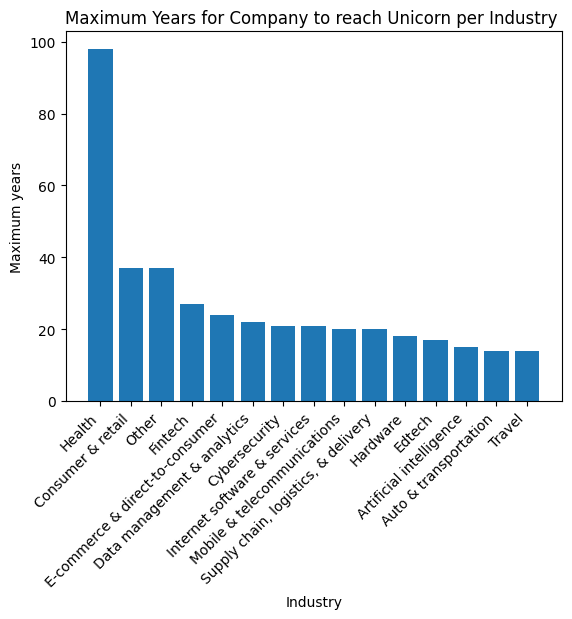

In [8]:
# visualize this information on a graph using industry column as the bar categories and years till unicorn as the height of bars.

plt.bar(industry_max.index, industry_max['Years_till_unicorn'])

# set the title

plt.title('Maximum Years for Company to reach Unicorn per Industry ')

# set x axis

plt.xlabel('Industry')

# set y axis label

plt.ylabel('Maximum years')

# rotate labels on the x axis to avoid overlap

plt.xticks(rotation = 45, horizontalalignment = 'right')

# display the plot

plt.show()

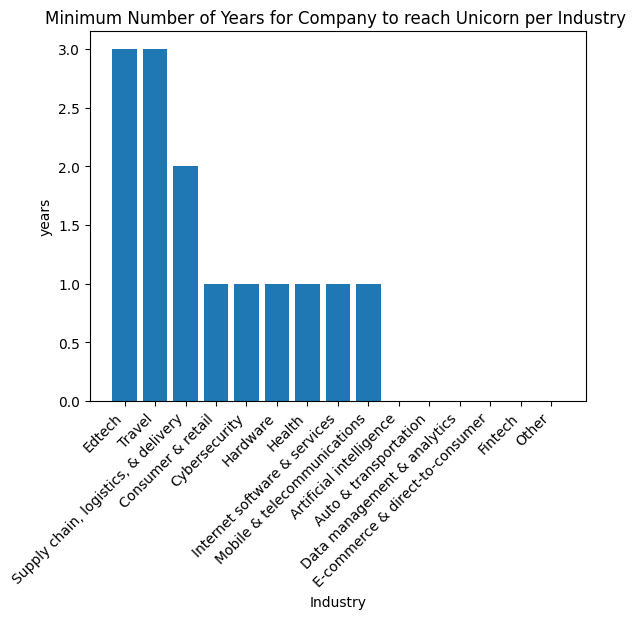

In [9]:
# visualize this information on a graph using industry column as the bar categories and years till unicorn as the height of bars.

plt.bar(industry_min.index, industry_min['Years_till_unicorn'])

# set the title

plt.title('Minimum Number of Years for Company to reach Unicorn per Industry ')

# set x axis

plt.xlabel('Industry')

# set y axis label

plt.ylabel('years')

# rotate labels on the x axis to avoid overlap

plt.xticks(rotation = 45, horizontalalignment = 'right')

# display the plot

plt.show()

In [10]:

# group the data by industry, get the max, min, and average value in the 'years till unicorn' column

industry_mean = (unicorns[['Industry', 'Years_till_unicorn']].groupby('Industry').mean().sort_values(by = 'Years_till_unicorn'))

# display

industry_mean

,Years_till_unicorn
Industry,
Auto & transportation,5.032258
Artificial intelligence,5.892857
Hardware,5.941176
E-commerce & direct-to-consumer,6.432432
Fintech,6.544643
Travel,6.571429
Mobile & telecommunications,6.594595
Cybersecurity,6.800000
"Supply chain, logistics, & delivery",6.929825


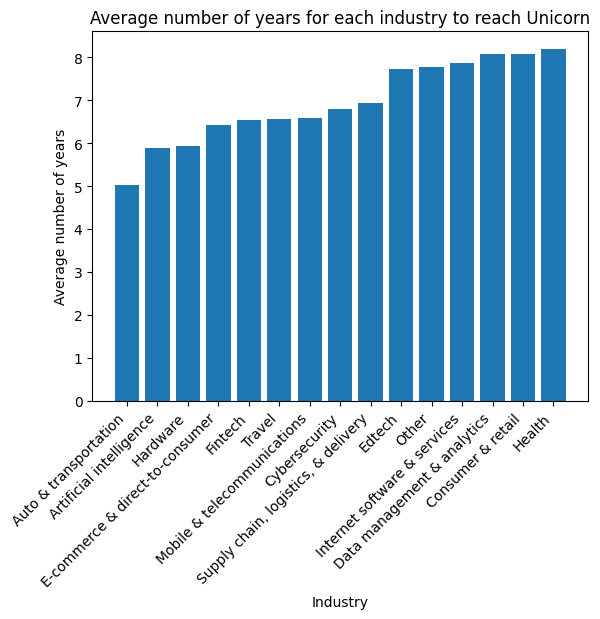

In [11]:
# visualize this information on a graph using industry column as the bar categories and years till unicorn as the height of bars.

plt.bar(industry_mean.index, industry_mean['Years_till_unicorn'])


# set the title

plt.title('Average number of years for each industry to reach Unicorn')

# set x axis

plt.xlabel('Industry')

# set y axis label

plt.ylabel('Average number of years')

# rotate labels on the x axis to avoid overlap

plt.xticks(rotation = 45, horizontalalignment = 'right')

# display the plot

plt.show()

Can any trend be identified from when a company was founded and how long it took to become a unicorn?

To observe and answer the above question, let's visualize when the year when companies were founded and how long the took to reach unicorn status.

We will use the seaborn package to visualize the information on a bar chart.

C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_7236\829087535.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=unicorns['Year Founded'],y=unicorns['Years_till_unicorn'], ci=None)


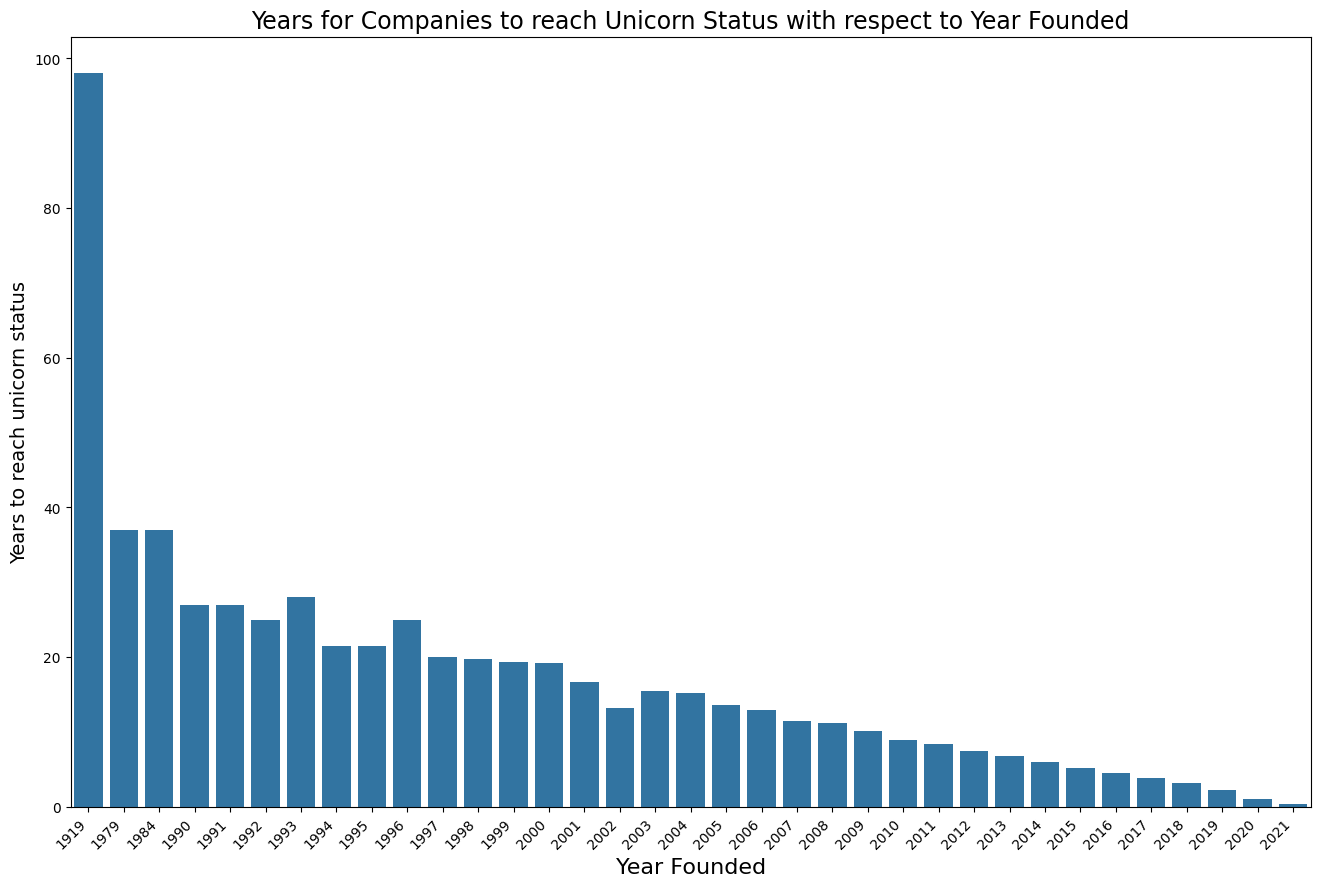

In [12]:
# first set the figure size

plt.figure(figsize=(16,10))

# define the x and y values. in this cause, year founded will be on the x axis

sns.barplot(x=unicorns['Year Founded'],y=unicorns['Years_till_unicorn'], ci=None)

# set the title and font size
plt.title('Years for Companies to reach Unicorn Status with respect to Year Founded', fontsize=17)

# set the xlabel and ylabels

plt.xlabel('Year Founded', fontsize=16)
plt.ylabel('Years to reach unicorn status', fontsize=14)

# rotate the xlabels for easy readabilty and no overlaps

plt.xticks(rotation=45, horizontalalignment='right')

# show the graph

plt.show()

It is clear from the data that companies founded earlier took longer to reach unicorn status while companies founded later in the dataset easily became unicorns.

So far we have look at time to become unicorn. let's look the worth of companies in our dataset now.

## 3. Maximum unicorn company valuation per industry

First, let's look at companies with the maximum valuation per industry.

To achieve this task, we prepare the data by creating another dataframe which will hold data on industry and valuation. we will use the .max() to obtain the companies with maximum valuation per industry.

In [13]:
# This line of code creates a dataframe called max_valuation with 2 columns, industry and valuation.
# the groupby() is used to aggragate and obtain the maximum values using max()
# sort_values() is used to sort the dataframe from smallest to largest using the valuation

max_valuation = (unicorns[['Industry', 'Valuation(billions)']].groupby('Industry').max().sort_values(by='Valuation(billions)'))

max_valuation

,Valuation(billions)
Industry,
Cybersecurity,9
Mobile & telecommunications,9
Travel,10
Auto & transportation,11
Hardware,12
Health,13
Edtech,22
Consumer & retail,38
Data management & analytics,38


The maximum valuation of a company in the Cybersecurity industry is $9B while the artificial intelligence industry has the max with $180B.

Let's see how this information appear on a bar chart.

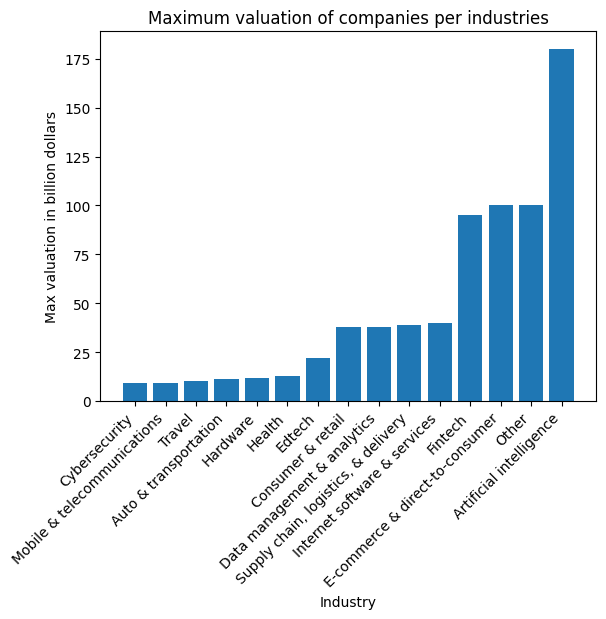

In [14]:
# draw a bar chart to visualize results

# visualize this information on a graph using industry column as the bar categories and years till unicorn as the height of bars.

plt.bar(max_valuation.index, max_valuation['Valuation(billions)'])

# set the title

plt.title('Maximum valuation of companies per industries')

# set x axis

plt.xlabel('Industry')

# set y axis label

plt.ylabel('Max valuation in billion dollars')

# rotate labels on the x axis to avoid overlap

plt.xticks(rotation = 45, horizontalalignment = 'right')

# display the plot

plt.show()

Let's look at the top 10 most valued companies in our dataset with their associated industries.

In [15]:
# display 10 unicorn companies with the biggest return on investments
# first create a dataframe with name top10 with three columns company, valuation and industry

top10 = unicorns[['Company', 'Valuation(billions)', 'Industry']].head(10)

#display the dataframe.

top10

,Company,Valuation(billions),Industry
0,Bytedance,180,Artificial intelligence
1,SpaceX,100,Other
2,SHEIN,100,E-commerce & direct-to-consumer
3,Stripe,95,Fintech
4,Klarna,46,Fintech
5,Canva,40,Internet software & services
6,Checkout.com,40,Fintech
7,Instacart,39,"Supply chain, logistics, & delivery"
8,JUUL Labs,38,Consumer & retail
9,Databricks,38,Data management & analytics


Visualize the result in using a bar plot.

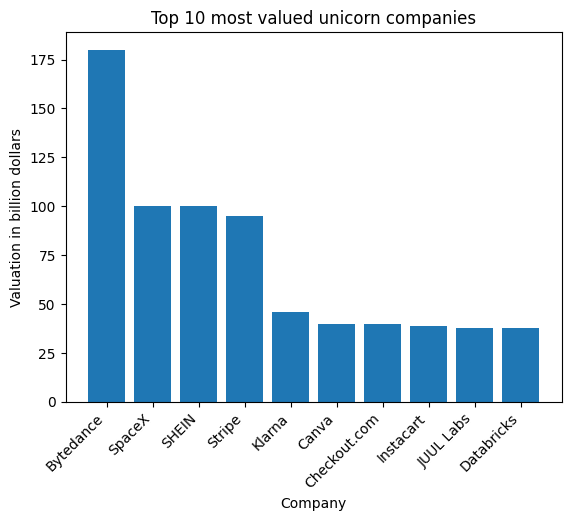

In [16]:
# visualize the top 10 unicorn companies on a bar
# use the matplotlib pyplot module.

plt.bar(x='Company', height='Valuation(billions)', data=top10)

# set the title

plt.title('Top 10 most valued unicorn companies')

# set the x and y labels

plt.xlabel('Company')
plt.ylabel('Valuation in billion dollars')
# rotate the xlabels

plt.xticks(rotation=45, horizontalalignment = 'right')

#show the chart
plt.show()

## 4. Companies with biggest return on investment (ROI)

Return on investment, or ROI, is a financial ratio that measures the profitability of an investment relative to its costs, expressed as a percentage. It is calculated by dividing the net return (gain or loss) from an investment by the initial cost of the investment. ROI is useful for comparing the efficiency and attractiveness of different investments

Now we will look at ROI as per industry and company to find which companies are more profited. This will help us make business recommendations to investors as well as verify if companies with high valuation also have high ROI values.

To calcute the ROI for each company, we will use the valuation of the company and the funding recieved.

that is, ROI = (Valuation - funding)/funding * 100%

Let's display the funding column for each company to see the format of data stored there.

In [17]:
# display the funding column
unicorns[['Funding']]

,Funding
0,$8B
1,$7B
2,$2B
3,$2B
4,$4B
...,...
1068,$379M
1069,$990M
1070,$80M
1071,$792M


As observed above, the column datatype is not integer. hence we can not use it for computing the ROI directly. also we have values both with $xB and $xM. All values have to be integer and all represent values in billion dollars.

first, we have to create another column for funding(billions) which is of type int from the present funding column.

In [18]:
#check the unique values in the funding column

unicorns.Funding.unique()

array(['$8B', '$7B', '$2B', '$4B', '$572M', '$3B', '$14B', '$5B', '$918M',
       '$476M', '$770M', '$979M', '$721M', '$490M', '$734M', '$427M',
       '$400M', '$1B', '$799M', '$765M', '$800M', '$376M', '$558M',
       '$294M', '$564M', '$333M', '$691M', '$343M', '$497M', '$71M',
       '$679M', '$775M', '$105M', '$742M', '$607M', '$549M', '$660M',
       '$820M', '$297M', '$922M', '$863M', '$447M', '$844M', '$603M',
       '$583M', '$912M', '$920M', '$849M', '$424M', '$645M', '$802M',
       '$629M', '$448M', '$928M', '$815M', '$728M', '$433M', '$891M',
       '$524M', '$803M', '$415M', '$587M', '$826M', '$910M', '$412M',
       '$405M', '$729M', '$600M', '$869M', '$187M', '$943M', '$514M',
       '$492M', '$644M', '$562M', '$286M', '$559M', '$647M', '$567M',
       '$428M', '$996M', '$596M', '$426M', '$462M', '$824M', '$926M',
       '$755M', '$633M', '$599M', '$371M', '$425M', '$761M', '$903M',
       '$704M', '$503M', '$655M', '$263M', '$216M', '$128M', '$776M',
       '$119M', '$

From the output above, it shows that the funding for some companies are not known. hence we will create another dataframe name unicorn_roi which will be used to calculate the roi of companies with both valuation and funding recorded.

In [60]:
# create another dataframe called unicorn_roi which contain only companies with a known funding
#use the loc[] to filter out rows with funding value as unknown.

unicorn_roi= unicorns.loc[unicorns['Funding'] != 'Unknown' ]


Now create a new funding column and convert all values to floats by removing $, B. for values in M, remove the M and divide the value by 1000 to obtain the results in billions

In [61]:
# create a new column named Funding(billions)
unicorn_roi['Funding(billions)'] = unicorn_roi['Funding']

# on the new column created, remove the B and $. this is to obtain the Funding as numbers (float).
unicorn_roi['Funding(billions)'] = unicorn_roi['Funding(billions)'].str.replace('B', '')
unicorn_roi['Funding(billions)'] = unicorn_roi['Funding(billions)'].str.replace('$', '')

# for funding values with M, remove the M and divide the value by 1000 to convert them to billions
# first check if the row contains an M using the .contain()
# then replaces the M with '', convert it to float and then divide by 1000

unicorn_roi.loc[unicorn_roi['Funding(billions)'].str.contains('M'), 'Funding(billions)'] = unicorn_roi['Funding(billions)'].str.replace('M', '').astype(float) / 1000
# change the datatype to 'float'
unicorn_roi['Funding(billions)'] = unicorn_roi['Funding(billions)'].astype(float)


C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_7236\4017916890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unicorn_roi['Funding(billions)'] = unicorn_roi['Funding']
C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_7236\4017916890.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unicorn_roi['Funding(billions)'] = unicorn_roi['Funding(billions)'].str.replace('B', '')
C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_7236\4017916890.py:6: SettingWithCopyWarning: 
A val

In [62]:
unicorn_roi

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions),Years_till_unicorn,Funding(billions)
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180,5,8.000
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100,10,7.000
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100,10,2.000
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95,4,2.000
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46,6,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,1,5,0.379
1069,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,1,2,0.990
1070,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,1,3,0.080
1071,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,1,16,0.792


In [22]:
unicorn_roi[['Funding(billions)']]

,Funding(billions)
0,8.000
1,7.000
2,2.000
3,2.000
4,4.000
...,...
1068,0.379
1069,0.990
1070,0.080
1071,0.792


Now, from the output above, we now have funding column in the dataframe unicorn_roi all in billion dollars which we can conveniently use to calculate the roi values for companies in our dataset.

Next calculate the roi values.

In [63]:
# use the formula for roi and the valuation and funding(billion) columns
# assign the results to another variable named roi
# use the round() to round the roi to 2dp
unicorn_roi['roi'] = round(((unicorn_roi['Valuation(billions)'] - unicorn_roi['Funding(billions)']) / unicorn_roi['Funding(billions)'])*100,2)
unicorn_roi

C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_7236\2857621010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unicorn_roi['roi'] = round(((unicorn_roi['Valuation(billions)'] - unicorn_roi['Funding(billions)']) / unicorn_roi['Funding(billions)'])*100,2)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions),Years_till_unicorn,Funding(billions),roi
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180,5,8.000,2150.00
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100,10,7.000,1328.57
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100,10,2.000,4900.00
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95,4,2.000,4650.00
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46,6,4.000,1050.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,1,5,0.379,163.85
1069,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,1,2,0.990,1.01
1070,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,1,3,0.080,1150.00
1071,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,1,16,0.792,26.26


We have successfully calculate the ROI for all companies, let's move further to aggregate the ROI per industry to compare between industries with maximum valuation and those with maximum ROI

Let's also look at top 10 companies with highest ROI values and compare with the previous results we had as 10 top companies with max valuation

In [64]:
# display the top 10 companies with maximum ROI values

top10_roi=unicorn_roi[['Company', 'roi']].sort_values(by='roi', ascending=False).head(11)
top10_roi

,Company,roi
189,Otto Bock HealthCare,inf
239,Zapier,399900.00
61,Dunamu,12576.06
791,Workhuman,11011.11
361,CFGI,10426.32
742,Manner,9900.00
72,DJI Innovations,7519.05
759,GalaxySpace,7042.86
5,Canva,6893.01
368,Il Makiage,6796.55


Otto Bock Healthcare has a roi value of infinity, this is clearly a mistake. Let's examine the company attributes and see what error occured

In [65]:
#select the company otto and display all its attributes.
# use loc[] to select only the row containing the otto bock healthcare company

otto =unicorn_roi.loc[unicorn_roi['Company']== 'Otto Bock HealthCare']
otto

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions),Years_till_unicorn,Funding(billions),roi
189,Otto Bock HealthCare,$4B,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners,2017,4,98,0.0,inf


As observed from the output cell above, the funding for this company is 0. This means there was a division by 0 when calculating the roi values. hence the erro (inf).

Let's drop this row from our dataframe of roi values since it's not useful to us in this case.

In [66]:
unicorn_roi = unicorn_roi.drop(index=189)
unicorn_roi

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation(billions),Years_till_unicorn,Funding(billions),roi
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180,5,8.000,2150.00
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100,10,7.000,1328.57
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100,10,2.000,4900.00
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95,4,2.000,4650.00
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46,6,4.000,1050.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,1,5,0.379,163.85
1069,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,1,2,0.990,1.01
1070,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,1,3,0.080,1150.00
1071,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,1,16,0.792,26.26


Let's again look at top 10 companies with highest ROI values and compare with the previous results we had as 10 top companies with max valuation

In [67]:
# display the top 10 companies with maximum ROI values

top10_roi=unicorn_roi[['Company', 'roi']].sort_values(by='roi', ascending=False).head(10)
top10_roi

,Company,roi
239,Zapier,399900.00
61,Dunamu,12576.06
791,Workhuman,11011.11
361,CFGI,10426.32
742,Manner,9900.00
72,DJI Innovations,7519.05
759,GalaxySpace,7042.86
5,Canva,6893.01
368,Il Makiage,6796.55
1011,Revolution Precrafted,6566.67


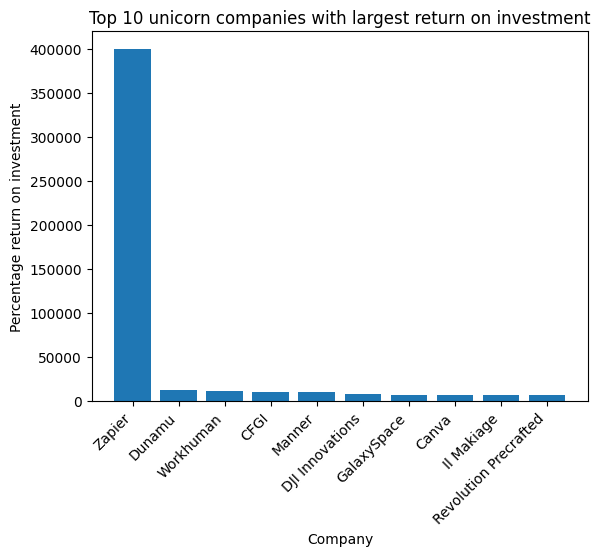

In [68]:
# visualize the top 10 unicorn companies on a bar
# use the matplotlib pyplot module.

plt.bar(x='Company', height='roi', data=top10_roi)

# set the title

plt.title('Top 10 unicorn companies with largest return on investment')

# set the x and y labels

plt.xlabel('Company')
plt.ylabel('Percentage return on investment')
# rotate the xlabels

plt.xticks(rotation=45, horizontalalignment = 'right')

#show the chart
plt.show()

Now, let's look at the companies with biggest roi values per industry.

In [69]:
# This line of code creates a dataframe called max_valuation with 2 columns, industry and valuation.
# the groupby() is used to aggragate and obtain the maximum values using max()
# sort_values() is used to sort the dataframe from smallest to largest using the valuation

max_roi = (unicorn_roi[['Industry', 'roi']].groupby('Industry').max().sort_values(by='roi'))

max_roi

,roi
Industry,
Travel,734.72
"Supply chain, logistics, & delivery",1200.00
Cybersecurity,1338.85
Data management & analytics,1420.91
Edtech,1512.90
Artificial intelligence,2150.00
Health,2225.58
Auto & transportation,2825.53
Consumer & retail,2930.30


Visualizing the above in a chart,

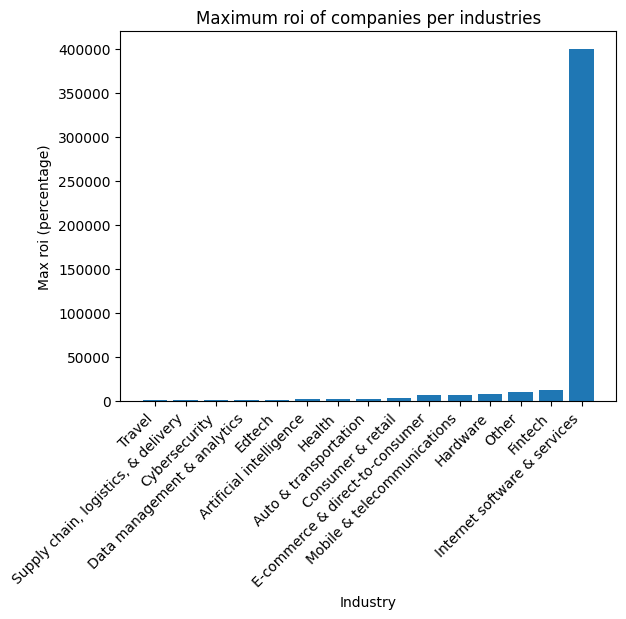

In [70]:
# draw a bar chart to visualize results

# visualize this information on a graph using industry column as the bar categories and roi as the height of bars.

plt.bar(max_roi.index, max_roi['roi'])

# set the title

plt.title('Maximum roi of companies per industries')

# set x axis

plt.xlabel('Industry')

# set y axis label

plt.ylabel('Max roi (percentage)')

# rotate labels on the x axis to avoid overlap

plt.xticks(rotation = 45, horizontalalignment = 'right')

# display the plot

plt.show()

The end. thanks for reading.